In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from seaborn_qqplot import pplot

In [83]:
df = pd.read_csv(r"C:\Users\jiyoo\workspace\project1\df3.csv", index_col = 0)
df.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.1
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.6
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.4
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.6


In [84]:
print( df.columns ) 

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol',
       'lifespan', 'sugar', 'BMI'],
      dtype='object')


In [85]:
print(df.head())
print ()
print (df.info())

   genetic  length   mass  exercise  smoking  alcohol  lifespan  sugar   BMI
0     73.9   185.0   99.7       0.9      0.0      2.4      73.1    6.9  29.1
1     86.0   172.0  105.4       1.8      8.1      0.4      85.0    4.2  35.6
2     83.3   176.0  111.4       1.1      0.8      4.6      81.6    7.5  36.0
3     82.8   164.0  111.4       4.7     11.8      1.0      81.0    2.9  41.4
4     78.7   178.0   71.6       1.5      8.3      4.9      75.0    5.5  22.6

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4095
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4084 non-null   float64
 1   length    4084 non-null   float64
 2   mass      4084 non-null   float64
 3   exercise  4084 non-null   float64
 4   smoking   4084 non-null   float64
 5   alcohol   4084 non-null   float64
 6   lifespan  4084 non-null   float64
 7   sugar     4084 non-null   float64
 8   BMI       4084 non-null   float64
dt

In [86]:
# remove negative values
df = df[(df >= 0).any(axis=1)]

In [87]:
# remove duplicates
df = df.drop_duplicates()

In [88]:
# convert non numeric to NaN
df = df.apply(lambda y: pd.to_numeric(y, errors='coerce') if y.dtype == 'object' else y)
df = df.apply(lambda y: pd.astype('float64') if y.dtype == 'object' else y)


In [89]:
# remove NaN
df = df.dropna()

In [90]:
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.216389,183.880889,92.155161,2.396672,9.809035,2.266846,80.129810,6.475805,27.540468
std,6.929577,12.549328,25.503372,1.154459,6.918614,1.801044,7.461525,2.681427,8.335842
min,68.628624,156.885162,50.000000,0.100000,0.000000,0.000000,64.877693,0.700000,11.300000
25%,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,75.000000,4.400000,20.900000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,79.700000,6.300000,26.500000
75%,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,85.200000,8.400000,33.200000
max,95.928624,210.885162,151.300930,4.953477,22.200000,6.000000,95.477693,12.487169,46.132076


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4095
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4084 non-null   float64
 1   length    4084 non-null   float64
 2   mass      4084 non-null   float64
 3   exercise  4084 non-null   float64
 4   smoking   4084 non-null   float64
 5   alcohol   4084 non-null   float64
 6   lifespan  4084 non-null   float64
 7   sugar     4084 non-null   float64
 8   BMI       4084 non-null   float64
dtypes: float64(9)
memory usage: 319.1 KB


In [92]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Clipping the IQR*|15.*IQD|
mean = df.mean()
df = df.clip(lower=mean-1.5*IQR, upper=mean+1.5*IQR, axis=1)
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

mean = df.mean()
df = df.clip(lower=mean-1.5*IQR, upper=mean+1.5*IQR, axis=1)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [94]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

X = train[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','BMI']]
y = train.lifespan

regr = LinearRegression()
regr.fit(X, y) 

score = regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','BMI']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) vanilla:', score)
a1=score

coefficient of determination(R²) vanilla: 0.9735103178598687


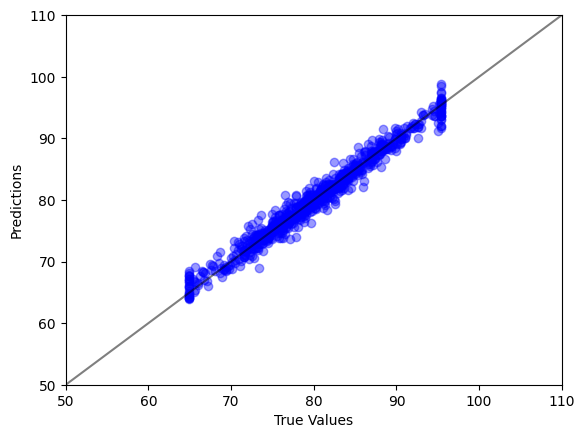

In [95]:
p_test = regr.predict(test.drop(columns=['lifespan']))

plt.scatter(test['lifespan'],p_test,c='blue', alpha=0.4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# plot diagonal line for comparison (prediction is exact)
lims=[50,110]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,c='black',alpha=0.5)
plt.show()

In [96]:
p_test

array([78.71482571, 68.54507158, 78.87322863, 94.70909238, 78.15573134,
       79.59002502, 82.43869266, 82.17967833, 72.63430878, 72.92956668,
       85.01988879, 76.16906674, 77.55496818, 79.83477944, 77.32983424,
       80.20240879, 82.08631585, 78.55628841, 76.92014118, 78.45396291,
       79.62365632, 95.38520808, 88.64229316, 95.02206291, 80.77551859,
       72.88359403, 80.4021709 , 85.1421839 , 78.32576802, 78.65302339,
       80.97725868, 81.19526533, 79.99627001, 93.56483411, 80.87089162,
       83.74150044, 85.29593931, 77.74997697, 80.84796232, 89.02839152,
       81.73885068, 75.09208731, 66.7560287 , 77.94464922, 81.97768629,
       73.61541457, 75.69228733, 90.10536224, 78.35180506, 72.85388884,
       66.03455075, 96.50991921, 82.53570359, 82.70817934, 68.82531484,
       81.40660219, 79.85203573, 67.2098629 , 79.23689342, 93.93521815,
       74.93177019, 81.4778166 , 85.42991413, 78.88696823, 67.53875924,
       82.46458651, 81.3714063 , 84.54674932, 78.7104948 , 73.96

In [97]:
print('Mean Absolute Error:', mean_absolute_error( test['lifespan'], p_test))
print('Mean Squared Error:', mean_squared_error(test['lifespan'], p_test))
import math
print('Mean Root Squared Error:', math.sqrt(mean_squared_error(test['lifespan'], p_test)))

Mean Absolute Error: 0.8923134637204224
Mean Squared Error: 1.4432333130107335
Mean Root Squared Error: 1.2013464583585924
